<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.1"></a>
## Multivariate linear regression
This is the function for multivariate linear regression $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = w_{1}x_{1}^{(i)} + w_{2}x_{2}^{(i)} + w_{3}x_{3}^{(i)} + \ldots + w_{n}x_{n}^{(i)} + b \tag{1}$$

### Data Preprocessing

#### Import Modules

In [52]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from typing import List, Tuple, Callable

#### Load Data

In [53]:
# Function for mean normalization
def mean_normalize(column_series):
    return (column_series - column_series.mean()) / (column_series.max() - column_series.min())


In [54]:
multi_feat = False 
normalize = False

if multi_feat:
    df = pd.read_excel('dataset/penjualan_multivariate.xlsx')
    x_train = df.drop(columns=['Penjualan'], axis=1).values
    y_train = df[['Penjualan']].values
    if normalize:
        df_scaled = df.copy()
        for column in df_scaled.columns:
            df_scaled[column] = mean_normalize(df_scaled[column])
        df = df_scaled
    x_train = df[['Hours']].values
    y_train = df[['Scores']].values
else:
    df = pd.read_csv('dataset/student_scores.csv')
    df = df.sort_values(by=['Hours'], axis=0)
    if normalize:
        df_scaled = df.copy()
        for column in df_scaled.columns:
            df_scaled[column] = mean_normalize(df_scaled[column])
        df = df_scaled
    x_train = df[['Hours']].values
    y_train = df[['Scores']].values
df

,Hours,Scores
14,1.1,17
5,1.5,20
17,1.9,24
0,2.5,21
16,2.5,30
20,2.7,30
9,2.7,25
2,3.2,27
13,3.3,42
4,3.5,30


#### Compute Model Without Traning

In [55]:
import numpy as np

def compute_model_output(x: np.ndarray, w: np.ndarray, b: float, mode: str = 'lin') -> np.ndarray:
    """
    Computes the prediction of a linear model.
    
    Args:
        x (np.ndarray): Input data, shape (m,)
        w (np.ndarray): Weight parameters, shape (m,)
        b (float): Bias parameter
        mode (str): model mode
        
    Returns:
        np.ndarray: Model predictions, shape (m,)
    """
    if mode not in ('lin','quadratic'):
        raise Exception("mode is not supported")
    if mode == 'quadratic':
        return (np.dot(x_train, w) + np.dot(x_train ** 2, w)) + b
    return np.dot(x, w) + b

def compute_cost(y_hat: np.ndarray, y_train: np.ndarray) -> float:
    """
    Computes the mean squared error cost between predicted and actual values.
    
    Args:
        y_hat (np.ndarray): Predicted values, shape (m,)
        y_train (np.ndarray): Actual values, shape (m,)
        
    Returns:
        float: Mean squared error cost
    """
    m = len(y_train)
    cost = 1 / (2 * m) * (np.sum((y_hat - y_train) ** 2))
    return cost


##### Tuning w and b manually

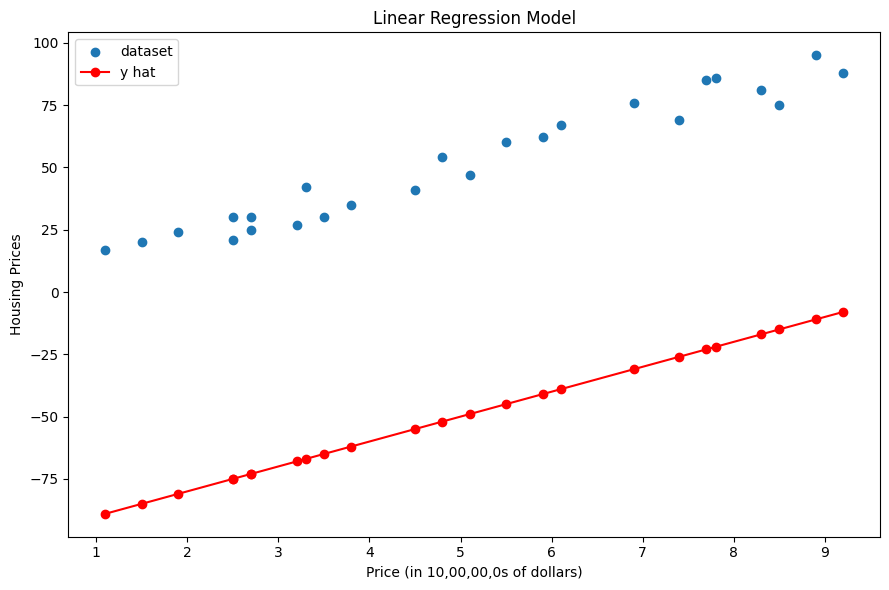

In [56]:
# Adjust w and b manually here to fit to the data

if not multi_feat:
    w = np.array([10])
    b = -100
    y_pred = compute_model_output(x_train, w, b, 'lin')
    fig, ax = plt.subplots(1, 1, figsize=(9, 6))
    ax.scatter(x_train, y_train, label='dataset')
    ax.plot(x_train, y_pred , color="red", marker='o', label='y hat')
    ax.set_xlabel('Price (in 10,00,00,0s of dollars)')
    ax.set_ylabel('Housing Prices')
    ax.set_title('Linear Regression Model')
    # ax.set_yscale('log')
    ax.legend()

    plt.tight_layout()
    plt.show()


##### Given list of w's we can see the cost function global minima

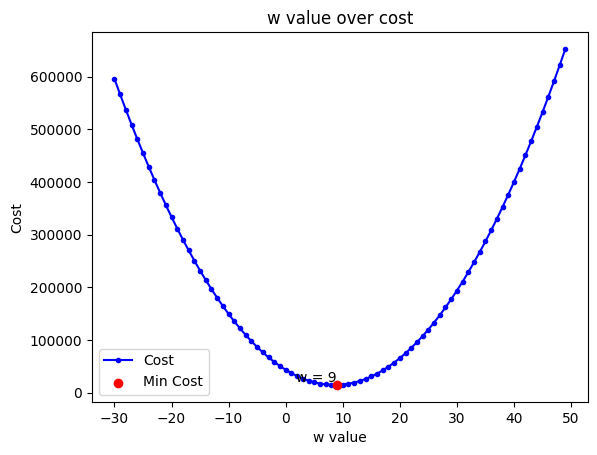

In [57]:
if not multi_feat:
    list_of_w = np.arange(-30, 50).reshape(-1, 1)
    b = -2

    cost_list = np.array([])
    for i in list_of_w:
        y_pred = compute_model_output(x_train, i, b)
        cost_list = np.append(cost_list, compute_cost(y_pred, y_train))

    min_cost_idx = np.argmin(cost_list)  # Find index of minimum cost
    min_cost_w = list_of_w[min_cost_idx][0]  # Extract the corresponding w value

    plt.plot(list_of_w, cost_list, 'b.-', label='Cost')
    plt.scatter(list_of_w[min_cost_idx], cost_list[min_cost_idx], color='red', label='Min Cost', zorder=5)
    plt.text(list_of_w[min_cost_idx], cost_list[min_cost_idx], f'w = {min_cost_w}', ha='right', va='bottom')  # Add text above the red dot
    plt.title('w value over cost')
    plt.xlabel('w value')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

In [58]:
import numpy as np
from typing import Tuple, List, Callable

def gradient_descent(x_train: np.ndarray, y_train: np.ndarray, w_init: np.ndarray, b_init: float, alpha: float,
                     num_iters: int) -> Tuple[np.ndarray, float, np.ndarray, np.ndarray]:
    """
    Performs gradient descent to fit w, b. Updates w, b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x_train (ndarray (m, n))  : Data, m examples, n features
      y_train (ndarray (m,))  : target values
      w_init (ndarray (n,)): initial values of model parameters for each feature
      b_init (float): initial value of the bias
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent

    Returns:
      w (ndarray): Updated values of parameters after running gradient descent for each feature
      b (float): Updated value of the bias after running gradient descent
      J_history (ndarray): History of cost values
      p_history (ndarray): History of parameters [w, b]
    """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = np.array([])
    p_history = {
        'w_hist': np.empty((0, x_train.shape[1])), 
        'b_hist': np.array([])
    }
    b = b_init
    w = w_init.copy()
    m, n = x_train.shape

    for i in range(num_iters):
        f_wb = compute_model_output(x_train,w,b,'lin')
        dw = np.dot(x_train.T, (f_wb - y_train)) / m
        db = np.sum(f_wb - y_train) / m

        w = w - alpha * dw
        b = b - alpha * db

        # Save cost J at each iteration
        J_history = np.append(J_history,compute_cost(f_wb, y_train)) 
        p_history['w_hist'] = np.append(p_history['w_hist'], w.reshape(1,-1), axis=0) 
        p_history['b_hist'] = np.append(p_history['b_hist'], b) 

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % max(1, math.ceil(num_iters / 10)) == 0:
            print(f"Iteration {i:4}: Cost {J_history[i]:0.2f}")

    return w, b, J_history, p_history  # return w and J, w history for graphing


# initialize parameters
w_init = np.random.rand(x_train.shape[1]).reshape(-1,1)
b_init = 1
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.0001
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,
                                                    iterations)
# print(f"(w, b) found by gradient descent: ({w_final}, {b_final})")

Iteration    0: Cost 1477.70
Iteration 1000: Cost 16.82
Iteration 2000: Cost 14.45
Iteration 3000: Cost 14.44
Iteration 4000: Cost 14.44
Iteration 5000: Cost 14.44
Iteration 6000: Cost 14.44
Iteration 7000: Cost 14.44
Iteration 8000: Cost 14.44
Iteration 9000: Cost 14.44


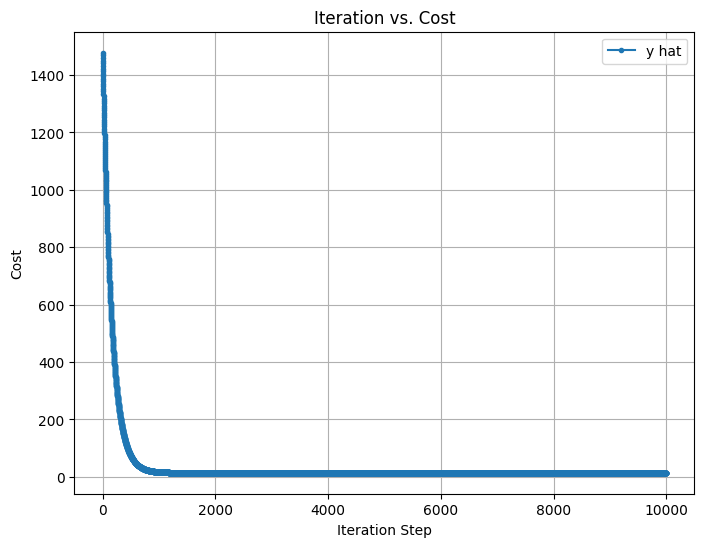

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(0, iterations), J_hist[:], marker='.', linestyle='-', label='y hat')
ax.set_xlabel('Iteration Step')
ax.set_ylabel('Cost')
ax.set_title('Iteration vs. Cost')
ax.legend()
ax.grid(True)

plt.show()

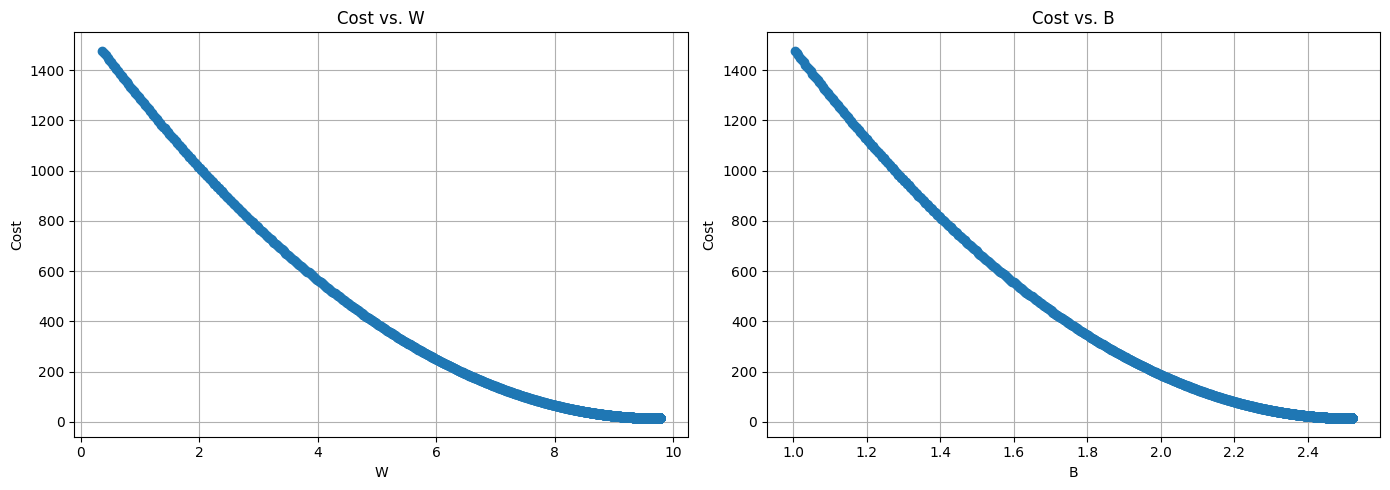

In [60]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot for W
axs[0].plot(p_hist['w_hist'], J_hist, marker='o', linestyle='-', label='y hat')
axs[0].set_xlabel('W')
axs[0].set_ylabel('Cost')
axs[0].set_title('Cost vs. W')
axs[0].grid(True)

# Plot for B
axs[1].plot(p_hist['b_hist'], J_hist, marker='o', linestyle='-', label='y hat')
axs[1].set_xlabel('B')
axs[1].set_ylabel('Cost')
axs[1].set_title('Cost vs. B')
axs[1].grid(True)

plt.tight_layout()
plt.show()


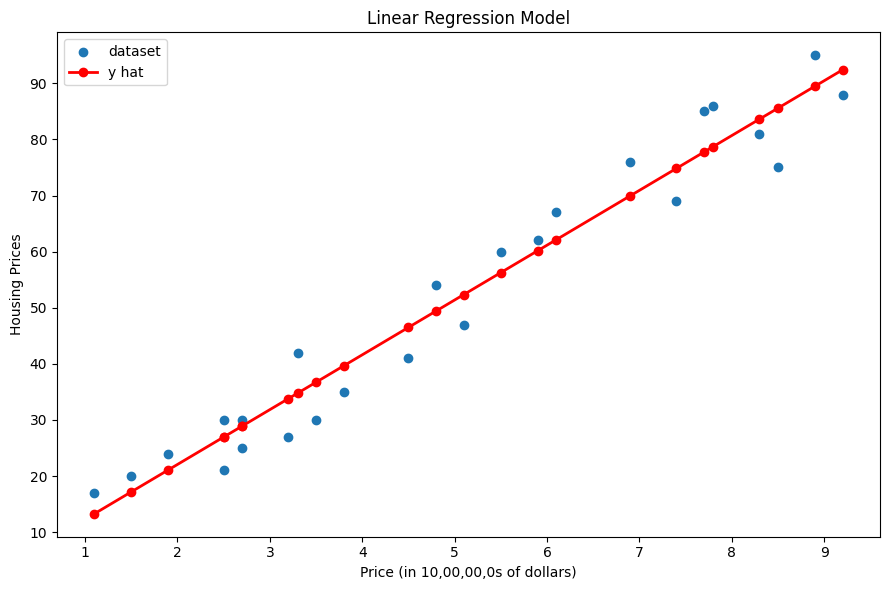

In [61]:
# Adjust w and b manually here to fit to the data
y_pred = compute_model_output(x_train, w_final, b_final, 'lin')

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.scatter(x_train, y_train, label='dataset')
ax.plot(x_train, y_pred, color="red", lw=2, ls='-', marker='o', label='y hat')
ax.set_xlabel('Price (in 10,00,00,0s of dollars)')
ax.set_ylabel('Housing Prices')
ax.set_title('Linear Regression Model')
# ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()


In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots



fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=np.array(range(0,len(y_train.flatten()))),y=y_train.flatten(), mode='lines+markers', name='y true'),row=1,col=1)
fig.add_trace(go.Scatter(x=np.array(range(0,len(y_hat.flatten()))),y=y_hat.flatten(), mode='lines+markers', name='y hat'),row=1,col=1)
fig.update_xaxes(title_text='',row=1,col=1)
fig.update_yaxes(title_text='Y value',row=1,col=1)
fig.update_layout(width=1600, height=700, title='y_hat vs y_true')
fig.show()

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import scipy.stats

mae = mean_absolute_error(y_train.flatten(), y_pred)
mse = mean_squared_error(y_train.flatten(), y_pred)
rmse = np.sqrt(mse)
corr = r2_score(y_train.flatten(), y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of Determination(R2): {corr}') # [-1,1]
print( scipy.stats.pearsonr(y_train.flatten(), y_pred.flatten()))


Mean absolute error: 4.97
Mean squared error: 28.88
Root mean squared error: 5.37
Coefficient of Determination(R2): 0.9529478646433246
PearsonRResult(statistic=0.9761906560220885, pvalue=9.132624467459856e-17)
